**Imports**

In [1]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import skew, kurtosis

**Load the data and create local copy**

In [2]:
# Load data
data_df = pd.read_csv("../amz_uk_price_prediction_dataset.csv")

# Create local copy
df = data_df.copy()

# Part 0: EDA 

**.info()** method

In [3]:
# information about the DataFrame (column names, their counts, types,...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


**.shape** attribute

In [4]:
# .shape attribute returns the number of rows and columns in order
df.shape

(2443651, 9)

In [5]:
print(f"Amazon UK Price Prediction Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Amazon UK Price Prediction Dataset has 2443651 rows and 9 columns


**.head()** method

In [6]:
# .head() method returns the first 5 rows by default (use .head(n) to show the first n rows instead)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


**.tail()** method

In [7]:
# .tail() method returns the last 5 rows by default (use .tail(n) to show the last n rows instead)
df.tail()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing
2443650,2828593,B08P3W9B3T,RIDEX CJ223 Motorcycle Motorbike Jacket Armour...,4.5,34,53.99,False,0,Motorbike Clothing


**.columns** attribute

In [8]:
# .columns attribute returns a list with column names
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

**.isnull()** method

In [9]:
# .isnull() method detects missing values for an array 
# apply .sum() to return the number of missing values  
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

**.eq()** method for detecting of empty spaces

In [10]:
# detect empty spaces
df.eq(" ").sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

**.duplicated()** method

In [11]:
# .duplicated() method detects duplicated rows in the DataFrame
# apply .sum() to return the number of duplicated values
df.duplicated().sum()

0

As we can see, Amazon UK price prediction is a clean dataset with no missing values, duplicated values, or empty spaces. This makes it easier for us to work with the data.

**.select_dtypes()** method to pick **Numerical** and **Non-numerical (Categorical)** columns

In [12]:
df_num = df.select_dtypes(include="number")
df_cat = df.select_dtypes(exclude="number")

**Nemerical**

In [13]:
print(df_num.columns)
df_num.head()

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')


,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


**Categorical**

In [14]:
print(df_cat.columns)
df_cat.head()

Index(['asin', 'title', 'isBestSeller', 'category'], dtype='object')


,asin,title,isBestSeller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers


## Part 1: Understanding Product Categories

**Frequency Table** for the product `category`

In [15]:
# Frequency table
category_counts = df["category"].value_counts()

**Top 5** most listed categories

In [16]:
top_5_categories = category_counts.head(5)
top_5_categories

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

In [17]:
print(f"The top 5 categories are:\n{top_5_categories.index.tolist()}")

The top 5 categories are:
['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories', 'Bath & Body', 'Birthday Gifts']


**Bar Chart** of top 10 product categories

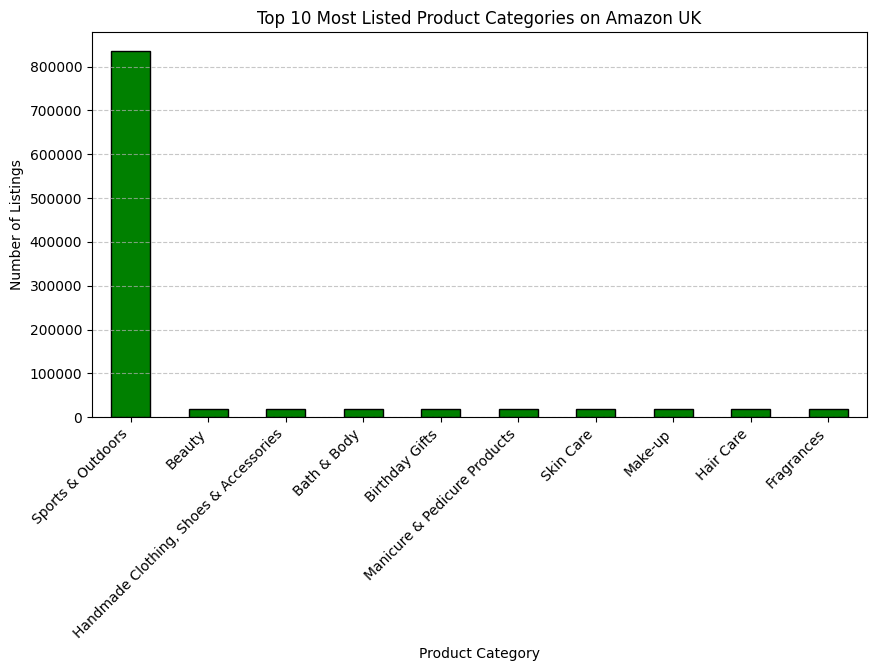

In [18]:
plt.figure(figsize=(10, 5))
category_counts.head(10).plot(kind='bar', color='green', edgecolor='black')
plt.title("Top 10 Most Listed Product Categories on Amazon UK")
plt.xlabel("Product Category")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Pie Chart** of top 10 categories

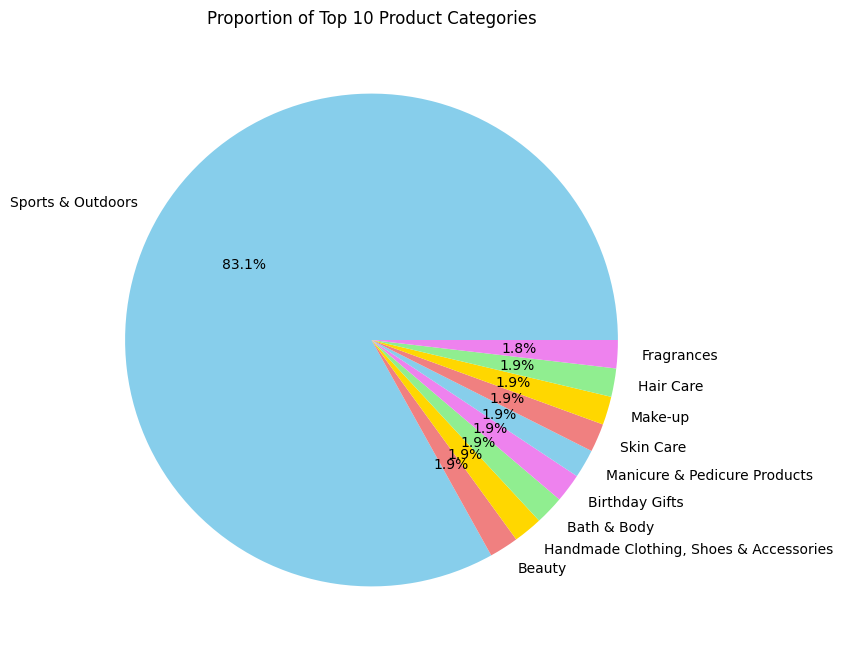

In [19]:
# Select the top 10
top_10_categories = category_counts.head(10)

# Pie Chart: Top 10 categories
plt.figure(figsize=(8, 8))
top_10_categories.plot(kind='pie', autopct='%1.1f%%', 
                      colors=['skyblue', 'lightcoral', 'gold', 'lightgreen', 'violet'])
plt.title("Proportion of Top 10 Product Categories")
plt.ylabel("")  # Hide the y-label for better readability
plt.show()

**Observation**
- As we can see, the category _Sports & Outdoors_ has the popularity rate of 83.1% in the list of top 10 most popular categories on Amazon UK.

# Part 2: Delving into Product Pricing

**Measures of Centrality for `price`**

In [20]:
# mean
avg_price = df["price"].mean()
print("The average price is: ", avg_price)

# median
med_price = df["price"].median()
print("The median price is: ", med_price)

# mode 
mode_price = df["price"].mode()[0]
print("The mode (most common) price is: ", mode_price)

The average price is:  89.24380943923663
The median price is:  19.09
The mode (most common) price is:  9.99


**Measures of Dispersion for `price`**

In [21]:
# variance
var_price = df["price"].var()
print("The variance of price is: ", var_price)

# standard deviation
std_price = df["price"].std()
print("The standard deviation of price is: ", std_price)

# range
rng_price = df["price"].max() - df["price"].min()
print("The price range is: ", rng_price)

# IQR 
Q1_price = df["price"].quantile(0.25)
Q3_price = df["price"].quantile(0.75)
IQR_price = Q3_price - Q1_price
print("The IQR of price is: ", IQR_price)

The variance of price is:  119445.48532254907
The standard deviation of price is:  345.60886175349884
The price range is:  100000.0
The IQR of price is:  36.0


**How varied are the product prices? Are there any indicators of a significant spread in prices?**
- **Variance of 119445.49**: A high variance indicates that product prices are widely spread out from the mean.
- **Standard Deviation of 345.61**: This confirms that prices deviate significantly from the average price, suggesting a large spread.
- **Price Range of 100000.00**: The difference between the highest and lowest prices is extreme, indicating the presence of high-end and low-end products.
- **Interquartile Range of IQR = 36.0**: This suggests that the middle 50% of prices are relatively close together compared to the full range, meaning extreme values are causing the large variance.

**Histogram** for the visualization of `price` distribution

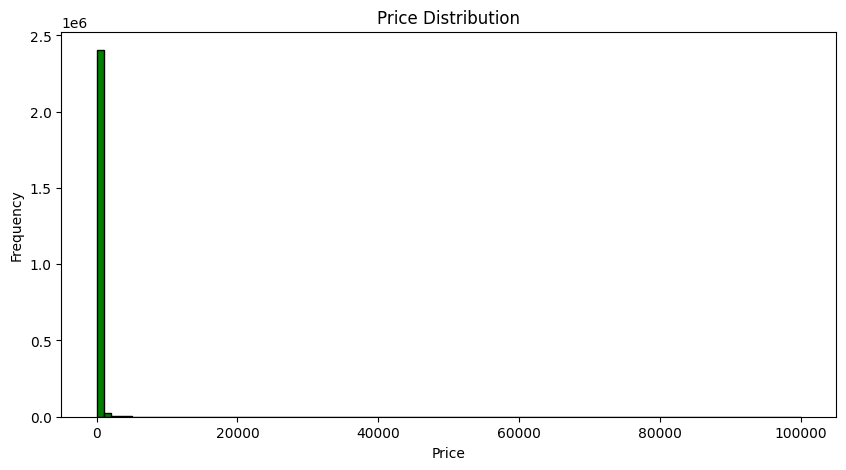

In [22]:
# histogram plot

plt.figure(figsize=(10, 5))
plt.hist(df["price"], bins=100, color='green', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**As we can see, it's impractical to read the frequency of distribution in the presence of outliers. To solve this issue, we filter out the outliers and plot the adjusted price.**

**Histogram of `price` distribution** in the absence of outliers

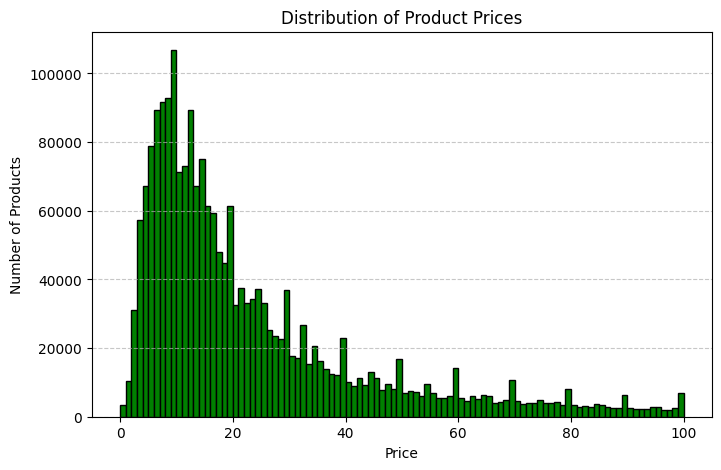

In [23]:
# define lower/upper bounds for the outliers
lower_bound = Q1_price - 1.5 * IQR_price
upper_bound = Q3_price + 1.5 * IQR_price

# filter out the outliers using logical expression
df_adjusted = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

plt.figure(figsize=(8,5))  # Adjust figure size for better readability
plt.hist(df_adjusted["price"], bins=100, color='green', edgecolor='black')

# Labels and Title
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Prices")

# Show Grid for Better Readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the Plot
plt.show()

**Box Plot** to showcase the spread and potential outliers in `price`

**Attention:** Due to memory issues, I used a sample size of 10000 instead of the original dataframe

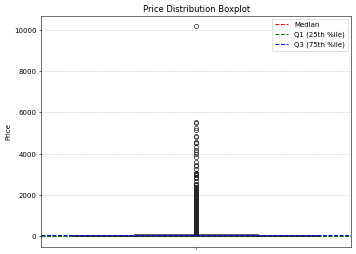

In [24]:
# Take a sample of size 1e4 
df_10k = df.sample(10000)

# Create the Box Plot
plt.figure(figsize=(8, 6), dpi=50)
sns.boxplot(y=df_10k['price'], color='green')

# Add dashed lines for important percentiles
median_price = df_10k['price'].median()
plt.axhline(median_price, color='red', linestyle='dashed', linewidth=1.5, label='Median')
plt.axhline(Q1_price, color='green', linestyle='dashed', linewidth=1.5, label='Q1 (25th %ile)')
plt.axhline(Q3_price, color='blue', linestyle='dashed', linewidth=1.5, label='Q3 (75th %ile)')

# Formatting
plt.title("Price Distribution Boxplot")
plt.ylabel("Price")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Part 3: Unpacking Product Ratings


**Measures of Centrality**

In [25]:
# mean rating
rating_avg = df["stars"].mean()
print("Mean rating is: ", rating_avg)

# median rating
rating_med = df["stars"].median()
print("Median rating is: ", rating_med)

# mode rating
rating_mode = df["stars"].mode()[0]
print("The most common (mode) rating is: ", rating_mode)

Mean rating is:  2.152836472966065
Median rating is:  0.0
The most common (mode) rating is:  0.0


**Measures of Dispersion**

In [26]:
# rating variance
rating_var = df["stars"].var()
print("Rating variance is: ", rating_var)

# rating standard deviation (std)
rating_std = df["stars"].std()
print("Rating std is: ", rating_std)

# rating IQR
rating_iqr = df["stars"].quantile(0.75) - df["stars"].quantile(0.25)
print("Rating IQR is: ", rating_iqr)

Rating variance is:  4.817434029796862
Rating std is:  2.1948653785134207
Rating IQR is:  4.4


**How do customers generally rate products? Is there a common trend?**
- **Mean rating (~2.15)** is quite low.
- **Median rating (0.0)** indicates that at least half of the ratings are zero.
- **Mode rating (0.0)** being zero means most ratings are the lowest possible score.

This is an unusual trend in customer ratings. Typically, product ratings follow a right-skewed distribution, where most ratings cluster around 4 and 5 stars since satisfied customers are more likely to leave positive reviews.

**Shape of distribution for ratings**

In [27]:
skewness = skew(df["stars"])
kurtosis_val = kurtosis(df["stars"])

print(f"Skewness is: {skewness}")
print(f"Kurtosis is: {kurtosis_val}")

Skewness is: 0.08120730776283354
Kurtosis is: -1.926004642549839


**Negative kurtosis means that rating distribution has lighter tails and a flatter peak compared to a normal distribution. In other words:**
- **Fewer extreme outliers** (less frequent very high or very low ratings, except for the mode at 0).
- **Ratings are more evenly spread** instead of clustering around a central value.
- **Lack of a strong peak** (unlike a normal distribution).

**Histogram** for ratings

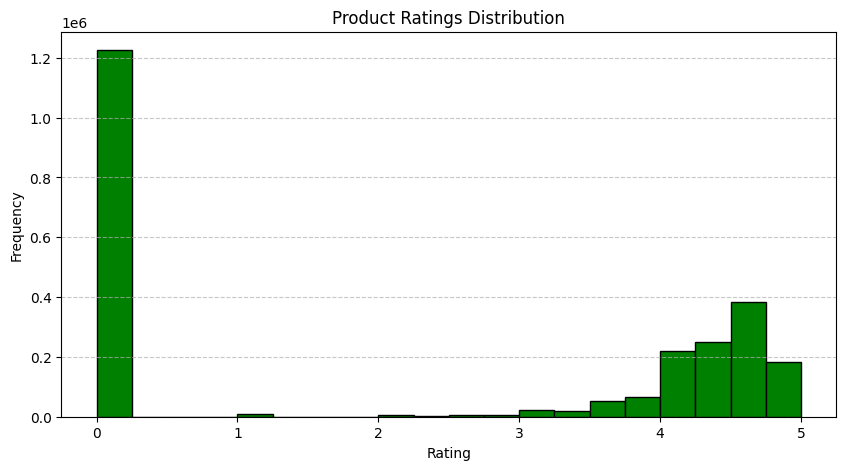

In [28]:
# Histogram for rating

plt.figure(figsize=(10, 5))
plt.hist(df["stars"], bins=20, color='green', edgecolor='black')
plt.title('Product Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7) # for better readability
plt.show()

**Is there a specific rating that is more common?**

- **The most common rating is by far 0. The second most common is about 4.5**